# Coastal Systems Notebook 2d: Tidal Constituents

In Chapter 3 of the book and slides, we learned that the tide is generated through the interplay between gravitational attraction forces in the Earth-Moon and Earth-Sun systems respectively. In this notebook we will explore these concepts in a more interactive way, with some exercises, visualizations, and code. We will not repeat the whole theory, however, so make sure you have followed the lectures for this week and read the relevant pages in chapter 3 of the book.

Earth has continents, oceans with varying water depths, and a complex gravitational field, hence the tidal signals we observe around the planet are complex. Fortunately, we can break them down into multiple harmonic components, called ***tidal constituents***. These can either be diurnal, semi-diurnal, short-, or long-period constituents. Each constituent is characterized by an amplitude, frequency and phase, and individually looks like a smooth sin/cosine curve. When we sum up all the individual components we observe signal beating resulting in complex tidal signals with spring-neap cycles, daily inequalities, and longer-term variations.

A table of principal tidal constituents is provided below (compare Table 3.5 in the book)). These components are direclty related to the astronomical forcing and the listed amplitudes are according to equilibrium theory. The period is given with more significant figures than in Table 3.5 to make more accurate calculations of the beating periods possible (**refer to respective notebook**).

|Tidal constituents | Name | Equil. <br> Amplitude [m] | Period [h] |
|-|-|-|-|
| **Semi-diurnal** |
| Principal lunar | M2 | 0.24 | 12.4206012 |
| Principal solar | S2 | 0.11 | 12 |
| Lunar elliptical | N2 | 0.046 | 12.65834751 |
| Lunar-solar declinational | K2 | 0.031 | 11.96723606 |
| **Diurnal** |
| Lunar-solar declinational | K1 | 0.14 | 23.93447213 |
| Principal lunar | O1 | 0.10 | 25.81933871 | 
| Principal solar | P1 | 0.047 | 24.06588766 | 
| Lunar elliptical | Q1 | 0.019 | 26.868350 |
| **Long period** |
| Fortnightly | Mf | 0.042 | 327.8599387 |
| Monthly | Mm | 0.022 | 661.3111655 | 
| Semi-annual | Ssa | 0.019 | 4383.076325 | 

<br><br>

In [1]:
# Run this to import modules

import pathlib
from pathlib import Path
import sys
from warnings import filterwarnings
import ipywidgets as widgets
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from datetime import datetime, timedelta
from IPython.display import display, Image
import math

cwd = pathlib.Path().resolve()
proj_dir = cwd.parent  # this is the root of the CoastalCodeBook
DATA_DIR = proj_dir / "data"


<br> <br>
## Visualisation of Astronomical Constituents

In this part of the exercise, our aim is to enhance the understanding of tidal constituents by visualising the full observational sea level in comparison to the tidal signal at Scheveningen. To achieve this, we will use two datasets:
- [GESLA-3 (Global Extreme Sea Level Analysis)](https://gesla787883612.wordpress.com/) sea level records
- [FES2014 Global Tide data](https://www.aviso.altimetry.fr/en/data/products/auxiliary-products/global-tide-fes/description-fes2014.html), providing amplitude and phase information for 34 tidal constituents, distributed on 1/16˚ grids.


<br> Look at the cell below and run it to see how the observed sea level matches up with the tidal signal derived from the available 34 constituents. The tidal constituents include both astronomical constituents (like in the Table above) and non-linear shallow-water tides or overtides. These tidal signals were computed for an arbitrary timeframe spanning from 1977 to 2017. The longest constituent taken into account in FES2014 is **?** with a period of **?**. **@Mia: What is the longest period in FES?** It's important to note that each tidal constituent signal includes the influence of even longer-period wave constituents, making them variable over extended periods. 

Can you explain why the tidal signal doesn't perfectly match the observed sea level?

**@Mia: I like both the code and the slider version, do you want to show them both, or only one of them? The slider works nice, but it is not so easy to select a shorter signal (a month or so) because the two sliders then overlap.**

**@Mia: I noticed that in the measured signal not only the maxima are higher but also the minima are lower (in full series particularly visible). Do you want the students to explain this from meteorological effects/surge and what would then be the explanation for the lower minima?** 


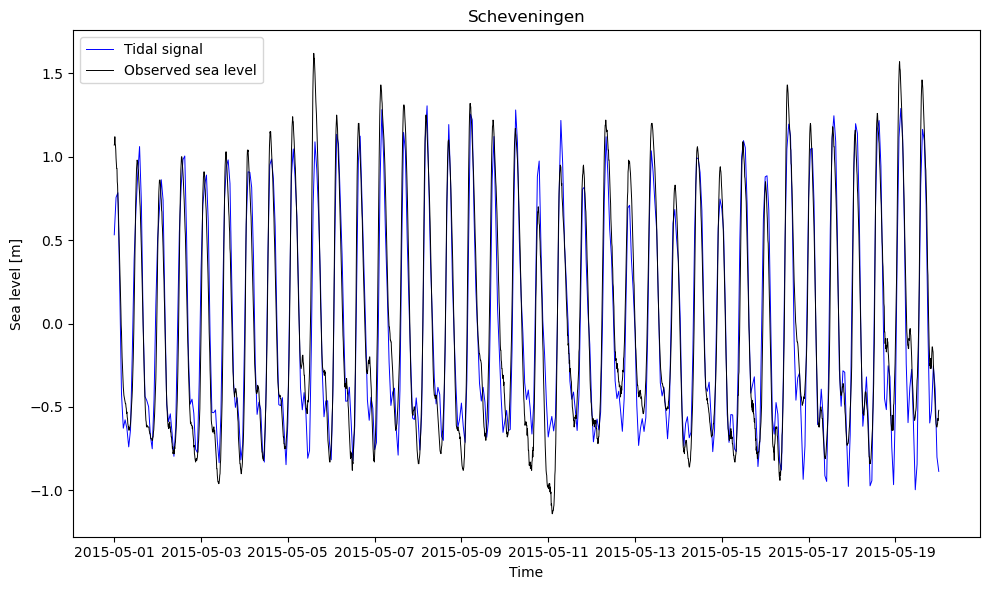

In [13]:
## Load GESLA tide gauge data for Scheveningen
tide_gauge = pd.read_pickle('../data/02_Scheveningen_GESLA.pkl')

## Load FES2014 data and turn indices into datetime
# Look at the commented script at the end of this notebook to see how to load FES2014 data and calculate the tidal signal

dates_fes = dates = np.array([
    datetime(1977, 1, 1, 0, 0, 0) + timedelta(seconds=item * 3600)
    for item in range(24*365*40) #40 years
]) # 1977 - 2017

comps = ['m2', 's2', 'n2', 'k2', 'k1', 'o1', 'p1', 'q1', 'mm', 'mf', 'ssa', 'all']
tide_fes = {}
data_dir_path = Path("../data/fes2014_signal/")
for comp in comps:
    fp = data_dir_path/("02_" + comp.lower() + ".p")
    tide_fes[comp] = pd.read_pickle(fp)
    tide_fes[comp].index = dates_fes

## Plot
# Choose a time window to plot (has to be between 1977 - 2017)
start_date = '2015-05-01 00:00' 
end_date = '2015-05-20 00:00'
filtered_gauge = tide_gauge[start_date:end_date]
filtered_tide = tide_fes['all'][start_date:end_date]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(filtered_tide.index, filtered_tide['scheveningen'], color='blue', 
        label='Tidal signal', linewidth=0.7)
ax.plot(filtered_gauge.index, filtered_gauge, color='black', 
        label='Observed sea level', linewidth=0.7)
ax.set_xlabel('Time')
ax.set_ylabel('Sea level [m]')
ax.set_title('Scheveningen')
ax.legend()
plt.tight_layout()
plt.show()


In [2]:
## Load GESLA tide gauge data for Scheveningen
tide_gauge = pd.read_pickle('../data/02_Scheveningen_GESLA.pkl')

## Load FES2014 data and turn indices into datetime
# in this case the tidal signal was calculated specifically for period 1977-2017
# look at the commented script at the end of this notebook to see how to load FES2014 data and calculate the tidal signal

dates_fes = np.array([
    datetime(1977, 1, 1, 0, 0, 0) + timedelta(seconds=item * 3600)
    for item in range(24*365*40) #40 years
]) # 1977 - 2017

comps = ['m2', 's2', 'n2', 'k2', 'k1', 'o1', 'p1', 'q1', 'mm', 'mf', 'ssa', 'all']
tide_fes = {}
data_dir_path = Path("../data/fes2014_signal/")
for comp in comps:
    fp = data_dir_path/("02_" + comp.lower() + ".p")
    tide_fes[comp] = pd.read_pickle(fp)
    tide_fes[comp].index = dates_fes

## Plot with interactive slider
date_range_selector = widgets.SelectionRangeSlider(
    options=[(date.strftime('%d-%m-%Y %H:%M'), date) for date in dates_fes],
    index=(0, len(dates_fes)-1),
    description='Dates',
    orientation='horizontal',
    layout={'width': '700px'},
    continous_update=False,
    readout=True
)
def plot_timeseries(date_range):
    start_date, end_date = date_range
    filtered_gauge = tide_gauge[start_date:end_date]
    filtered_tide = tide_fes['all'][start_date:end_date]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(filtered_gauge.index, filtered_gauge, color='black', 
            label='Observed sea level', linewidth=0.7)
    ax.plot(filtered_tide.index, filtered_tide['scheveningen'], color='blue', 
            label='Tidal signal', linewidth=0.7)
    ax.set_xlabel('Time')
    ax.set_ylabel('Sea level [m]')
    ax.set_title('Scheveningen')
    ax.legend()
    plt.tight_layout()
    plt.show()
    
widgets.interactive(plot_timeseries, date_range=date_range_selector)


# this version is slow, but with a nice slider to pick a time period

interactive(children=(SelectionRangeSlider(description='Dates', index=(0, 350399), layout=Layout(width='700px'…

<br><br><br>
What if we don't use all 34 tidal constituents? 
Below is an interactive plot in which you can adjust the plotted time range using the slider (from 1 day to 1 year). You can select which tidal constituents should be plotted with the tick boxes. This way you can play around with the different constituents and see what kind of signal you get and how close it is to the total tidal signal.

The plot displays the individual tidal components (upper plot), their combined tidal signal (second plot), and the observed sea level along with the total tidal signal (third plot).

**@Mia is the time-variation in for instance M2 due to longer-period components that are not taken into account (as you mentioned above) and how long are these? Does this explain the quite rapid fluctuation in M2 (length order of spring-neap cycle)? I think we should add some more explanation for the students to understand why the individual harmonic components vary in time.**

In [6]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

from initialize.tide_initialize import plot_timeseries_with_interactive_controls

# Choose one year to plot (has to be between 1977 - 2017)
dates = np.array([
    datetime(2013, 1, 1, 0, 0, 0) + timedelta(seconds=item * 3600)
    for item in range(24*365) #1 year
])

plot_timeseries_with_interactive_controls(comps, dates, tide_fes, tide_gauge)

<br><br>

Use the interactive plot above and try to answer the questions below.



In [10]:
## Write your code here to get the answer to questions 1. Use the table of principal constituents.
## @Mia What do you mean with questions 1. in above line?

# T_group = 2*math.pi / (omega2-omega1) #equation 3.24b from the textbook
# omega2 = ?
# omega1 = ?
# T = ? [days]

T=14.77

print(T)

14.77


In [11]:
## Run this cell to get questions

from initialize.tide_initialize import init1
init1()

# answer1: [14.77, 15]
# answer2: daily inequality



1. Set the time range to around 30 days and select only the main semi-diurnal components (M2 and S2). Which phenomenon can you detect when looking at the combined signal of these two? What is the period of this combined signal (in days)? 




2. Now select the M2 and K1 components. Looking at the combined signal, which phenomenon can you detect this time?


<br><br><br>
## Tidal Amplitudes

Let's look at the amplitudes of the tidal constituents at Scheveningen. 
- What are the main constituents?
- What are their frequencies (Table 3.5)? 

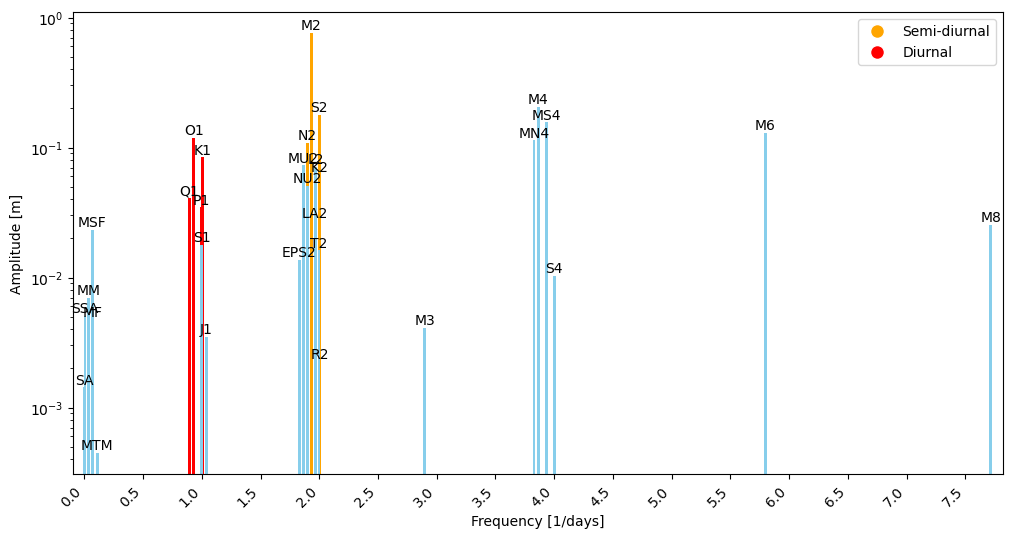

In [8]:
## Load FES2014 amplitudes
data_dir_path = Path("../data/fes2014_amp_ph/")
tide = {}; amplitudes = {};

# This time we will include more constituents:
comps = ['eps2', 'j1', 'k1', 'k2', 'l2', 'la2', 'm2', 'm3', 'm4', 'm6', 'm8', 'mf',
         'mm', 'mn4', 'ms4', 'msf', 'mtm', 'mu2', 'n2', 'nu2', 'o1', 'p1', 'q1',
         'r2', 's1', 's2', 's4', 'sa', 'ssa', 't2']

periods = [13.13, 23.10, 23.93, 11.97, 12.19, 12.22, 12.42, 8.28, 6.21, 4.14, 3.11, 327.9, 
           661.29, 6.27, 6.10, 354.37, 219, 12.87, 12.66, 12.63, 25.80, 24.07, 26.87,
          11.984, 24, 12, 6, 8766.15, 4383.077, 12.016] # in [h]

frequency = [1 / (period/24) for period in periods] # in [1/days]

for comp in comps:
    fp = data_dir_path / ("02_" + comp + ".p")
    tide[comp] = pd.read_pickle(fp)
    amplitudes[comp] = tide[comp]['amplitude']['scheveningen']
    
component_names = list(amplitudes.keys())
component_names_upper = [comp.upper() for comp in component_names]  # Convert to uppercase
amplitude_values = [value / 100 for value in amplitudes.values()] 

semidiurnal = ['m2', 's2', 'n2', 'k2']
diurnal = ['k1', 'o1', 'p1', 'q1']

## Bar plot
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.025  # Using a small width for better visualization

for i, freq in enumerate(frequency):
    ax.bar(freq, amplitude_values[i], color='skyblue', width=bar_width)

    # Plot semi-diurnal components in orange
    if component_names[i] in semidiurnal:
        ax.bar(freq, amplitude_values[i], color='orange', width=bar_width)

    # Plot diurnal components in red
    if component_names[i] in diurnal:
        ax.bar(freq, amplitude_values[i], color='red', width=bar_width)

    ax.text(freq, amplitude_values[i], 
                component_names[i].upper(), ha='center', va='bottom', rotation=0)

ax.set_xlabel('Frequency [1/days]')
ax.set_ylabel('Amplitude [m]')
ticks = np.arange(0, max(frequency) + 0.1, 0.5)
plt.xticks(rotation=45, ha='right', ticks=ticks)  
plt.xlim([0 - 0.1, max(frequency) + 0.1])
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Semi-diurnal'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Diurnal')
]
ax.legend(handles=legend_elements)
plt.yscale('log') # comment this line to see the differences better
plt.show()


<br><br><br>
Compare now the amplitude provided from FES2014 with the equilibrium amplitude. Why do we notice such a difference?

In [9]:
# Let's focus only on the main components from Table 3.5
comps = ['m2', 's2', 'n2', 'k2', 'k1', 'o1', 'p1', 'q1', 'mm', 'mf', 'ssa']

eq_amplitudes = {'m2': 24, 's2': 11, 'n2': 4.6, 'k2': 3.1, 
                 'k1': 14, 'o1': 10, 'p1': 4.7, 'q1': 1.9, 
                 'mm': 2.2, 'mf': 4.2, 'ssa': 1.9 } # in cm

# Compute the ratios
ratio = {comp: amplitudes[comp] / eq_amplitudes[comp] for comp in comps}

# Print the ratios with two decimals
print(f"\nThe ratios of amplitudes at Scheveningen and equilibrium amplitudes are:")
for comp, value in ratio.items():
    print(f"{comp}: {value:.2f}")



The ratios of amplitudes at Scheveningen and equilibrium amplitudes are:
m2: 3.16
s2: 1.61
n2: 2.37
k2: 1.98
k1: 0.60
o1: 1.18
p1: 0.74
q1: 2.15
mm: 0.32
mf: 0.11
ssa: 0.27


<br><br>
Examine the computed M2 amplitude and phase pattern along the Atlantic. What insights does this pattern provide? (Hint: Look at Figure 3.30 from textbook)

![image](../notebooks/figures/02_M2_amplitude_phase.png)

In [129]:
### Script for loading FES2014 data

# import xarray as xr
# import pickle
# import numpy as np
# from os.path import join
# import pandas as pd

# import os
# import matplotlib.pyplot as plt
# from datetime import datetime, timedelta
# import pytz
# import pyfes # works with python version <=3.10, only on Windows

# comps = ['eps2', 'j1', 'k1', 'k2', 'l2', 'la2', 'm2', 'm3', 'm4', 'm6', 'm8', 'mf', 'mks2',
#          'mm', 'mn4', 'ms4', 'msf', 'msqm', 'mtm', 'mu2', 'n2', 'n4', 'nu2', 'o1', 'p1', 'q1',
#          'r2', 's1', 's2', 's4', 'sa', 'ssa', 't2', 'all']

# # Creating the time series, this is arbitrary
# dates = np.array([
#     datetime(1977, 1, 1, 0, 0, 0) + timedelta(seconds=item * 3600)
#     for item in range(24*365*40) #40 years
# ])

# # Locations
# locs = {
#     'scheveningen'  :   [52.125, 4.25], #lat, lon
#     'galveston'     :   [29.25, -94.6875],
#     'valparaiso'    :   [-33, -71.625], 
#     'jakarta'       :   [-6.0625, 106.8125],
# }

# # Tide calculation using pyfes
# config_ocean = {}
# short_tide = {}
# tide = {}
# lp = {}
# tide_total = {}
# tide_fes = {comp: {} for comp in comps}
# filepath = 'file_path/file.ini' # path to .ini files

# for comp in comps:
#     for location, coords in locs.items():
#         lat, lon = coords
#         lats = np.full(dates.shape, lat)
#         lons = np.full(dates.shape, lon)
#         config_ocean[comp] = os.path.join(filepath, f'{comp}.ini')
#         short_tide[comp] = pyfes.Handler('ocean', 'io', config_ocean[comp])
#         tide[comp], lp[comp], _ = short_tide[comp].calculate(lons, lats, dates)  # compute tide
#         tide_total[comp] = (tide[comp] + lp[comp]) / 100 # convert to meters
#         tide_fes[comp][location] = tide_total[comp]

# Here lp is the long period wave constituents of the tidal spectrum, hence the signals are not constant over long periods!
